In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("mars_radiation_prediction.csv")

In [3]:
# Define features (normalized inputs) and target
features = [
    "pressure_norm",
    "EPITHERMAL_FLUX1_norm",
    "FAST_FLUX1_norm",
    "stormy_days_normalized",
    "elevation_m"
]
target = "predicted_dose_e"

In [4]:
# Prepare inputs (X) and output (y)
X = df[features]
y = df[target]

In [5]:
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
# Predict and evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

In [8]:
# Print model coefficients and R²
print("Coefficients of model:")
for name, coef in zip(features, model.coef_):
    print(f"{name:25s}: {coef:.4f}")

print(f"\nR² on test: {r2:.3f}")

Coefficients of model:
pressure_norm            : -0.0245
EPITHERMAL_FLUX1_norm    : 0.0055
FAST_FLUX1_norm          : 0.1230
stormy_days_normalized   : 0.0029
elevation_m              : -0.0000

R² on test: 0.338


In [20]:
# Create elevation bins (e.g. every 1000 meters)
df["elev_bin"] = pd.cut(df["elevation_m"], bins=range(-8000, 24000, 1000))

In [22]:
# Calculate average predicted doses for each elevation band
grouped = df.groupby("elev_bin", observed=True)[["predicted_dose_b", "predicted_dose_e"]].mean().reset_index()

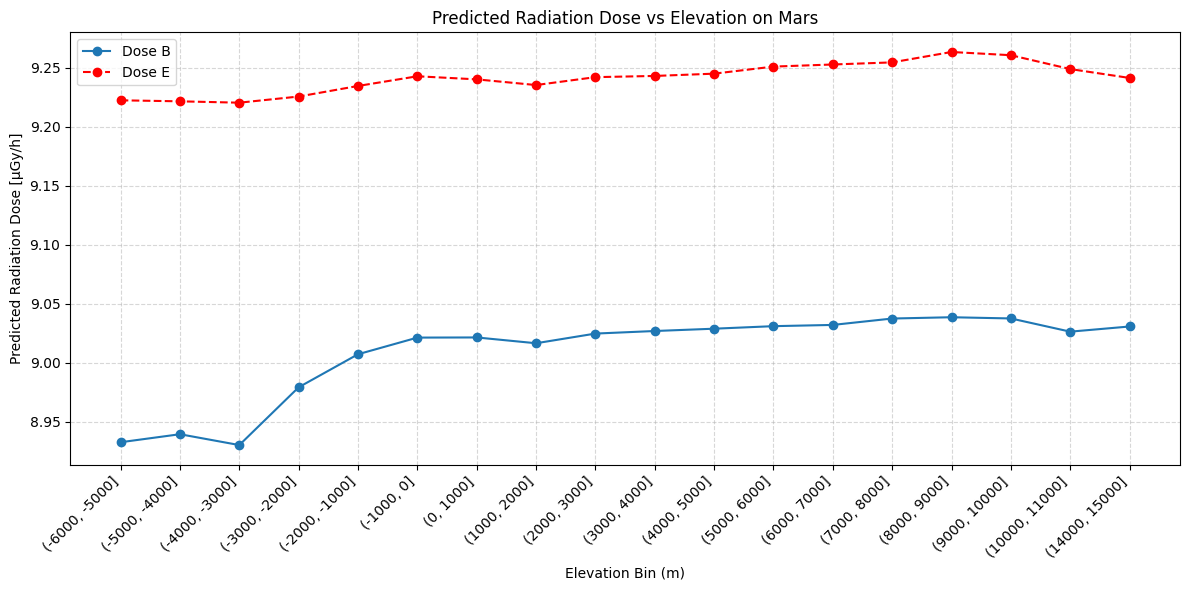

In [24]:
# Convert elevation bins to string labels for plotting
x_labels = grouped["elev_bin"].astype(str)

# Create the plot
plt.figure(figsize=(12, 6))

# Plot predicted Dose B (solid line)
plt.plot(x_labels, grouped["predicted_dose_b"], marker='o', linestyle='-', label="Dose B")

# Plot predicted Dose E (dashed line)
plt.plot(x_labels, grouped["predicted_dose_e"], marker='o', linestyle='--', label="Dose E", color='red')

# Axis and title configuration
plt.xlabel("Elevation Bin (m)")
plt.ylabel("Predicted Radiation Dose [µGy/h]")
plt.title("Predicted Radiation Dose vs Elevation on Mars")

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha="right")

# Add grid and legend
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()

# Adjust layout and show the figure
plt.tight_layout()
plt.show()